In [ ]:
from google.colab import files
dataset = files.upload()

Saving Iris.csv to Iris.csv


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
sns.set()

In [ ]:
iris = pd.read_csv('Iris.csv',engine='python', sep=";")
iris.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
X=iris.iloc[:,0:4].values #girdi değişkenleri
y=iris.iloc[:,-1].values #çıktı değişkeni

In [ ]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
y = le.fit_transform(y)

In [ ]:
from sklearn.preprocessing import MinMaxScaler

sc = MinMaxScaler(feature_range=(0,1))
X = sc.fit_transform(X)

In [ ]:
!pip install minisom

In [ ]:
from minisom import MiniSom    
from matplotlib.gridspec import GridSpec

In [ ]:
som = MiniSom(x=7, y=7, input_len=4, sigma=1, learning_rate=0.5) 


x ve y : dimension of SOM 

input_len : number of attributes

sigma :  radius of a different neighborhood in the grid 

learning rate : learning rate which is hyperparameter the size of how much weight is updated during each iteration

In [ ]:
som.random_weights_init(X) #randomly initialize weights 

In [ ]:
som.train_random(data=X, num_iteration=150) #train the model

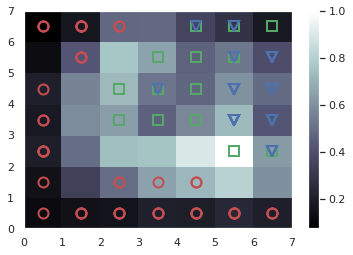

In [ ]:
#build a map of the Self Organizing Map
from pylab import bone,pcolor,colorbar,plot,show

bone()
pcolor(som.distance_map().T)
colorbar()
markers = ['o', 's', 'v'] #o : circle, s:square, v:triangle
colors = ['r', 'g', 'b']
for i, x in enumerate(X):
    w = som.winner(x)
    plot(w[0] + 0.5,
         w[1] + 0.5,
         markers[y[i]],
         markeredgecolor = colors[y[i]],
         markerfacecolor = 'None',
         markersize = 10,
         markeredgewidth = 2)
show()